# What You Will Learn

* Built-in Bash Options for Debugging.
* Variables for debugging - How to use variables to control the behavior of a script.
* Manual debugging tips.
* Syntax Highlighting and how it can help to avoid common mistakes.
* More Bash built-ins - we'll learn about a special bash variable that we can use to get valuable information about what is happening in a script execution.
* Differences between Windows & linux file types and the problems that occur when we create scripts in multiple different operating systems.

# Why Debug?

* A bug is really an error.
* Examine the inner workings of your script.
* Determine the root of unexpected behavior.
* The process of finding bugs (errors) in a script is called **Debugging**.

# Built in Debugging Help

**Bash shell provides some options for debugging.**
* `-x` = Prints commands & their arguments values as they are executed.
* Similarly, for wildcards, it prints the value after substitutions and expansions.
* This type of debugging is called an **x-trace**, or **tracing**, or **print debugging**.
* `#!/bin/bash -x`
* `set -x`: to start debugging trace at the command-line, **OR** for debugging specific parts of the script.
* `set +x`: to stop debugging trace at the command-line, **OR** for debugging specific parts of the script.

**Example 1**: Enable debugging at script level
```bash
#!/bin/bash -x

TEST_VAR="test"
echo "$TEST_VAR"
```

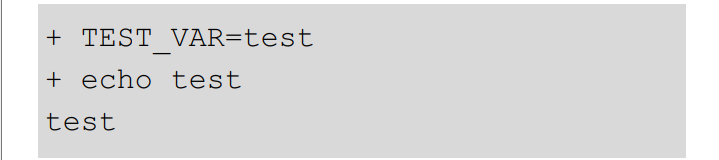

**Example 2**:Enable debugging for specific parts of the script
```bash
#!/bin/bash
TEST_VAR="test"

set -x
echo $TEST_VAR
set +x

hostname
```

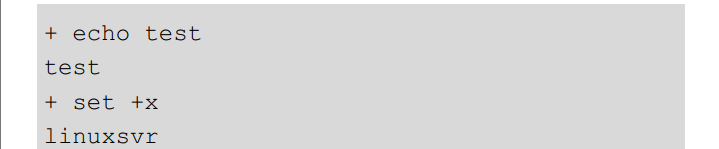

# Built in Debugging Help

* `-e` = Exit on error.
* It causes the script to exit immediately if a command exits with a **non-zero** exit status.
* Remember, exit status zero indicates successful completion of a command.
* Can be combined with other options.

```bash
#!/bin/bash -ex

#!/bin/bash -xe

#!/bin/bash -e -x

#!/bin/bash -x -e
```

**Example 1**
```bash
#!/bin/bash -e
FILE_NAME="/not/here"
ls $FILE_NAME
echo $FILE_NAME
```

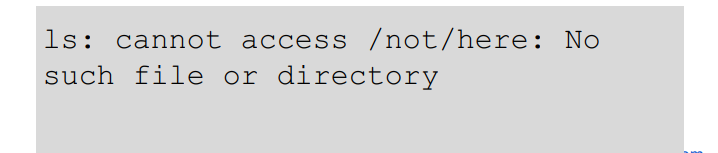

**Example 2**
```bash
#!/bin/bash -ex
FILE_NAME="/not/here"
ls $FILE_NAME
echo $FILE_NAME
```

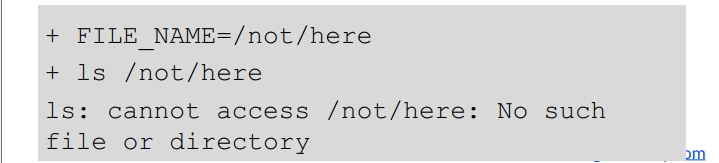

# Built in Debugging Help

* `-v` = Prints shell input lines as they are read in from the script.
* It prints everything before any substitutions and expansions are applied.
* The `-x` option performs wildcard substitution & expansions, but the `-v` option does not do that.
* Can be combined with other options.


**Example**
```bash
#!/bin/bash -v
TEST_VAR="test"
echo "$TEST_VAR"
```

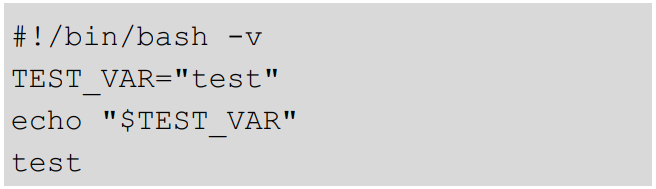

```bash
#!/bin/bash -vx
TEST_VAR="test"
echo "$TEST_VAR"
```

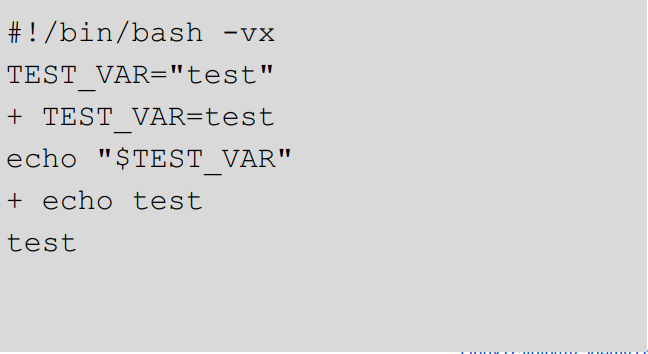

# For more information

```
help set | less
```

This will display the information about the options available for the `set` command for available **shell options** for debugging.

# Manual Debugging

* Most of the time, using `-x`,`-e`, and `-v` is sufficient.
* But if you want a bit more control around debugging, you can create your own debugging code.
* Use a special variable like `DEBUG`
    * `DEBUG=true`
    * `DEBUG=false`
* Note that in bash true & false are boolean values. But if we use quotes around them like 'true' or 'false', then they are treated as a string, not a boolean.

**Example 1**:
```bash
#!/bin/bash
DEBUG=true

if $DEBUG
then
    echo "Debug mode ON."
else
    echo "Debug mode OFF."
fi
```

**Example 2**:
```bash
#!/bin/bash

DEBUG=true
$DEBUG && echo "Debug mode ON."
```

**Example 3**:
```bash
#!/bin/bash
DEBUG=false
$DEBUG || echo "Debug mode OFF."
```

**Example 4**:
```bash
#!/bin/bash
DEBUG=true
$DEBUG || echo "Debug mode OFF."
```

**Example 5**:
```bash
#!/bin/bash
DEBUG="echo"
$DEBUG ls
```

**Example 6**:
```bash
#!/bin/bash
#DEBUG="echo"
$DEBUG ls
```

**Example 6**:
```bash
#!/bin/bash

debug() {
    echo "Executing: $@"
    $@
}

debug ls
```

# Manual Copy and Paste

* Open up a second terminal.
* Copy and paste the commands into the terminal.
* Can be helpful to use **"set -x"** on the command line.

# Syntax Highlighting

* Syntax errors are common.
* Typos, missing brackets, missing quotes, etc.
* Use an editor with syntax highlighting.

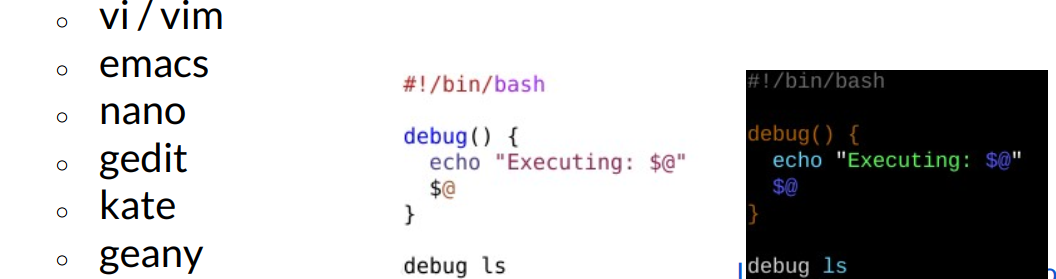

# PS4

* The `PS4` variable controls what is displayed before a line when using the **"`-x`"** option for debugging.
* The `PS4` variable is expanded and displayed before each command during an execution trace.
* That means, when you're using **`set -x`** option or the `-x` option for your bash script, the contents of `PS4` are printed to the screen.
* By default value of `PS4` variable is just a **"+"** sign.
* However, we can explicitly set the `PS4` variable as follows: **`PS4='+ $BASH_SOURCE : $LINENO '`**
* Bash includes several other built-in variables, such as :
    * `BASH_SOURCE`: which contains the name of the script executing,
    * `LINENO`: Line number of the script executing, etc.


**Example 1**:
```bash
#!/bin/bash -x
PS4='+ $BASH_SOURCE : $LINENO : '
TEST_VAR="test"
echo "$TEST_VAR"
```

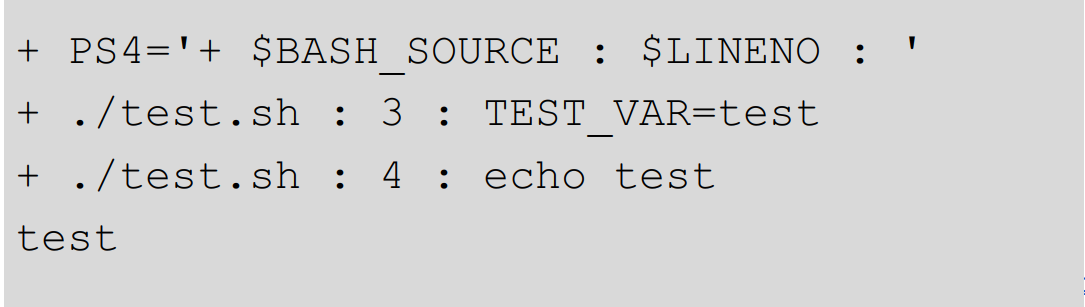

**Example 2**:
```bash
#!/bin/bash -x

PS4='+ ${BASH_SOURCE}:${LINENO}:${FUNCNAME[0]}() '

debug() {
    echo "Executing: $@"
    $@
}

debug ls
```

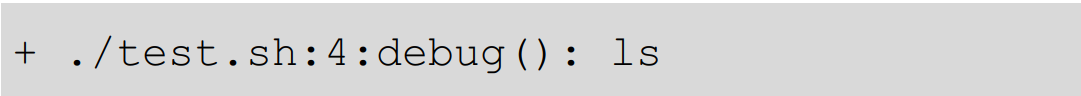



# DOS vs Linux (Unix) File Types

Plain text files or shell scripts contain a control character to represent the end of a line.
* For Unix & Linux, the control character representing the end of a line is a **Line Feed (LF)**.
* DOS or Windows systems use two characters to represent the end of a line, **CRLF** = Carriage Return (CR) + Line Feed (LF).

If you have ever created a text file on a linux system and opened it in a Windows system.
* You get everything displayed in **one long single line**.
* This is due to a lack of **Carriage Return (CR)** character.
* This is because the file was created on a Unix System and Unix used Line Feed (LF) only to represent the end of a line.

If you do the opposite, that is, create a file in Windows and open it in a Unix system.
* Then you'll find an additional character, **Carriage Return (CR)**, at the end of each line.
* This is because the file was created on a Windows system and Windows uses **CRLF `[Carriage Return (CR) + Line Feed (LF)]`** to represent the end of a line.
* The problem in this situation is that when you display the content of the file to the screen, say using the `cat` command, you'll not see the additional **Carriage Return (CR)**

To get the **Carriage Return (CR)** characters to be displayed on the screen, we've to run `cat` with the `-v` option **to display non-printable characters**. 

> Note that **Carriage Return (CR)** character is represented as **^M**.

**Example: `cat -v script.sh`**
```bash
#!/bin/bash^M

# This file contains carriage returns.^M
echo "Hello world."^M
```

If we try to execute the file with **Carriage Return (CR)**, we'll get an error as follows:

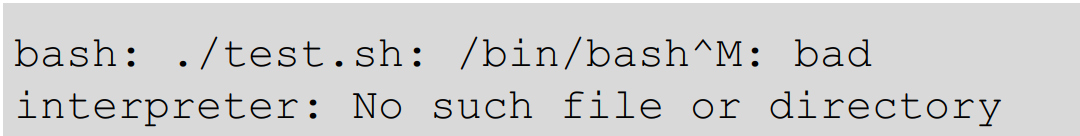

Here are some more options to see/display non-printable characters in a file:
* **`file script.sh`**:
    * `script.sh` - Bourne-Again shell script, ASCII text executable, with CRLF line terminators
    * If there is any **Carriage Return (CR)**, it will alert you.
* **`dos2unix script.sh`**
    * Convert a file created in DOS into a Unix-compatible file by removing DOS/Windows-specific non-printable characters.
    * The `dos2unix` utility removes non-printable characters from a file, such as **Carriage Return (CR)**.
* **`unix2dos script.sh`**
    * Convert a file created in Unix into a DOS-compatible file by removing Unix-specific non-printable characters.

# How does this happen?

* Using a Windows editor and uploading to Linux
* Some editors can be configured to use just **LF**
* Pasting from Windows into a Linux terminal
* Pasting from a web browser into a terminal